mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
directory = '/content/drive/MyDrive/PhosGly-RAM/'

Importing Necessary Libraries

In [ ]:
%%capture
%%bash
pip install imbalanced-learn
pip install lazypredict

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import re
import csv


from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std


import os
import os.path
import pickle

import sklearn 

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.utils import class_weight
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict





from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from scipy import stats

#feature selection
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
import math
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

#lazy predict

#import lazypredict
#from lazypredict.Supervised import LazyClassifier


#make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Dataset Preprocessing

Extract Positive RAMs and write them to seperate CSVs.

In [ ]:
#read the file
pos = open(directory+'Dataset/'+'PositiveRAM.txt', 'r')
pos_content = pos.readlines()


#the list of lists of positive rams
positive_ram=[] #463 to 555 of total positive rams
cnt=0
for i,line in enumerate(pos_content):
    line = line.strip()
    if("#" in line and line[0]=='#'):
        ram = []
        for ram_line in range(i+1,i+21):
            ram_line_str = pos_content[ram_line].strip()
            #print(ram_line_str)
            ram_line_sublist = list(map(str,re.findall(r"[-+]?\d*\.\d+|\d+", ram_line_str)))
            ram.append(ram_line_sublist)
        if ram not in positive_ram:
            positive_ram.append(ram)

#convert strings to float
for ram in positive_ram:
    for i,line in enumerate(ram):
        line = list(map(float,line))
        ram[i] = line



print(positive_ram)

print("The len of positive_ram is ", len(positive_ram))


#write the positive_ram to csvs
for j in range(0,len(positive_ram)):    
    file = open(directory+'Dataset/positive/p'+ str(j)+'.csv','w',newline='')
    with file:
        write = csv.writer(file)
        write.writerows(positive_ram[j])

[[[1.0, 19.0, 20.0, 40.0, 81.0, 88.0], [4.0, 22.0, 30.0, 32.0, 45.0, 58.0], [7.0, 48.0, 79.0, 155.0, 170.0, 184.0], [2.0, 56.0, 60.0, 75.0, 77.0, 102.0], [29.0, 130.0, 186.0, 219.0, 581.0, 845.0], [4.0, 7.0, 9.0, 15.0, 26.0, 71.0], [3.0, 34.0, 50.0, 51.0, 61.0, 70.0], [8.0, 12.0, 33.0, 35.0, 36.0, 37.0], [5.0, 44.0, 47.0, 157.0, 192.0, 195.0], [17.0, 76.0, 113.0, 177.0, 235.0, 320.0], [11.0, 62.0, 68.0, 72.0, 78.0, 86.0], [0.0, 13.0, 31.0, 46.0, 66.0, 73.0], [18.0, 53.0, 152.0, 171.0, 247.0, 269.0], [59.0, 65.0, 87.0, 90.0, 109.0, 112.0], [6.0, 10.0, 11.0, 13.0, 14.0, 21.0], [3.0, 6.0, 16.0, 23.0, 24.0, 25.0], [2.0, 8.0, 9.0, 10.0, 12.0, 105.0], [1.0, 89.0, 164.0, 249.0, 392.0, 457.0], [69.0, 84.0, 95.0, 101.0, 123.0, 125.0], [5.0, 41.0, 42.0, 57.0, 104.0, 194.0]], [[3.0, 3.0, 16.0, 17.0, 19.0, 28.0], [13.0, 29.0, 84.0, 119.0, 120.0, 166.0], [23.0, 27.0, 65.0, 147.0, 153.0, 189.0], [7.0, 9.0, 20.0, 24.0, 62.0, 66.0], [1.0, 92.0, 132.0, 152.0, 177.0, 110.8], [5.0, 16.0, 30.0, 36.0, 38.0

Extract Negative RAMs and write them to seperate CSVs.

In [ ]:
#read the file
neg = open(directory+'Dataset/'+'NegativeRAM.txt', 'r')
neg_content = neg.readlines()


#the list of lists of negative rams
negative_ram=[] 
cnt=0
for i,line in enumerate(neg_content):
    line = line.strip()
    if("#" in line and line[0]=='#'):
        ram = []
        for ram_line in range(i+1,i+21):
            ram_line_str = neg_content[ram_line].strip()
            #print(ram_line_str)
            ram_line_sublist = list(map(str,re.findall(r"[-+]?\d*\.\d+|\d+", ram_line_str)))
            ram.append(ram_line_sublist)
        if ram not in negative_ram:
            negative_ram.append(ram)

#convert strings to float
for ram in negative_ram:
    for i,line in enumerate(ram):
        line = list(map(float,line))
        ram[i] = line



print(negative_ram)

print("The len of negative_ram is ", len(negative_ram))


#write the negative_ram to csvs
for j in range(0,len(negative_ram)):    
    file = open(directory+'Dataset/negative/n'+ str(j)+'.csv','w',newline='')
    with file:
        write = csv.writer(file)
        write.writerows(negative_ram[j])


[[[14.0, 16.0, 23.0, 28.0, 38.0, 42.0], [5.0, 12.0, 21.0, 30.0, 30.0, 33.0], [3.0, 7.0, 25.0, 29.0, 29.0, 58.0], [8.0, 15.0, 36.0, 67.0, 83.0, 93.0], [1.0, 4.0, 4.0, 24.0, 27.0, 34.0], [8.0, 10.0, 18.0, 25.0, 89.0, 269.0], [16.0, 20.0, 24.0, 26.0, 32.0, 35.0], [12.0, 13.0, 28.0, 54.0, 62.0, 105.0], [19.0, 92.0, 255.0, 122.0, 122.0, 122.0], [22.0, 47.0, 52.0, 72.0, 91.0, 95.0], [6.0, 7.0, 23.0, 31.0, 34.0, 48.0], [0.0, 1.0, 2.0, 2.0, 15.0, 32.0], [17.0, 18.0, 27.0, 39.0, 44.0, 82.0], [21.0, 33.0, 109.0, 144.0, 76.75, 76.75], [17.0, 50.0, 63.0, 66.0, 135.0, 142.0], [3.0, 13.0, 37.0, 51.0, 55.0, 71.0], [5.0, 9.0, 10.0, 11.0, 11.0, 14.0], [31.0, 207.0, 238.0, 158.667, 158.667, 158.6667], [6.0, 80.0, 90.0, 106.0, 133.0, 83.0], [9.0, 22.0, 57.0, 76.0, 104.0, 122.0]], [[16.0, 19.0, 22.0, 24.0, 32.0, 50.0], [13.0, 24.0, 28.0, 40.0, 59.0, 64.0], [15.0, 28.0, 34.0, 41.0, 45.0, 88.0], [2.0, 6.0, 8.0, 17.0, 25.0, 39.0], [4.0, 12.0, 45.0, 138.0, 145.0, 225.0], [12.0, 16.0, 26.0, 30.0, 37.0, 41.0], 

# 2. Feature Extraction

Normalization Function

In [ ]:
def MaxMinNormalization(x):
    if(np.max(x) - np.min(x)!=0):
        x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x

read RAM CSVs

In [ ]:
def readram(filename):
    with open(filename) as fs:
        ram=[]
        data = csv.reader(fs)
        for line in data:
            line=[float(x) for x in line]
            ram.append(line)
            
    ram=np.array(ram)
    return ram

Get Amino Acid Composition(AAC)  : 6 columns for each sample as the RAM contained 6 columns

In [ ]:
def AAC(ram):
    feature1=np.zeros(6)
    for i in range(0,6):
        feature1[i]=ram[:,i].mean()
    feature1=np.round(feature1,6)
    feature=[]
    for i in range(0,6):
        num=[]
        num.append(feature1[i])
        feature.extend(num)
    return feature

Get Tri-peptide Composition(TPC): got 36 columns, as the RAM contains 6 columns

In [ ]:
def TPC(ram):
    L=len(ram)
    feature1=[]
    feature=[]
    for i in range(0,6):
        a=0
        for j in range(0,6):
            b=0
            for k in range(0,L-1):
                b=b+ram[k][i]*ram[k+1][j]
                a=a+ram[k+1][j]*ram[k][i]
            num=[]
            if(a!=0):
                num.append(b/a)
            else:
                num.append(0.0)
            feature1.extend(num)
    for i in range(0,36):
        num=[]
        num.append(feature1[i])
        feature.extend(num)
    return feature

Combine both features

In [ ]:
def combinefeature():
    y_train0=[]
    y_train1=[]
    y_train=[]
    x_train=[]
    x_train0=[]
    for i in range(0,93):
        feature=[]
        ram = readram(directory+'Dataset/positive/'+'p' + str(i) + '.csv')
        feature.extend(AAC(ram))
        feature.extend(TPC(ram))
        x_train.append(feature)
        y_train1.append(1.0)
    for i in range(0,233):
        feature=[]
        ram = readram(directory+'Dataset/negative/'+'n' + str(i) + '.csv')
        feature.extend(AAC(ram))
        feature.extend(TPC(ram))
        x_train0.append(feature)
        y_train0.append(0.0)
    x_train.extend(x_train0)
    y_train1.extend(y_train0)
    y_train.extend(y_train1)
    return x_train,y_train

Write the features for both positive and negative RAMs

In [ ]:
def getfeature():
    
    train_x,train_y=combinefeature()
    feature=[]
    for i in range(0,len(train_x)):
        feature.append(MaxMinNormalization(train_x[i]))
    csvFile = open(directory+"Features/Extracted_93-233-RAM-aac+tpc.csv", 'a',newline='')
    writer = csv.writer(csvFile,dialect='excel')
    for i in range(0,len(feature)):
        writer.writerow(feature[i])
    csvFile.close()

getfeature()

# 3. Spliting the dataset into train and test

read all the features to a dataframe x

In [ ]:
x = pd.read_csv(directory+"Features/Extracted_93-233-RAM-aac+tpc.csv",header=None)

x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.072223,0.254397,0.377693,0.519352,0.777310,1.000000,0.004017,0.002672,0.001000,0.000497,0.000317,0.000260,0.004017,0.002413,0.001047,0.000417,0.000362,0.000154,0.004017,0.002192,0.000959,0.000353,0.000237,0.000029,0.004017,0.002273,0.000985,0.000378,0.000218,0.000011,0.004017,0.002164,0.000939,0.000341,0.000172,0.000000,0.004017,0.002250,0.000998,0.000385,0.000225,0.000032
1,0.149699,0.357498,0.576785,0.767600,1.000000,0.978721,0.007337,0.004420,0.003845,0.002162,0.001267,0.000235,0.007337,0.004118,0.003284,0.001834,0.001011,0.000099,0.007337,0.004109,0.003182,0.001857,0.001061,0.000168,0.007337,0.004189,0.003253,0.001876,0.001149,0.000138,0.007337,0.004389,0.003263,0.001759,0.001125,0.000026,0.007337,0.004425,0.003247,0.001790,0.001112,0.000000
2,0.188127,0.395603,0.543059,0.699901,0.942203,1.000000,0.011031,0.006071,0.003555,0.002158,0.001792,0.000184,0.011031,0.006031,0.003411,0.001872,0.001337,0.000005,0.011031,0.006043,0.003365,0.001871,0.001241,0.000000,0.011031,0.006259,0.003509,0.001938,0.001322,0.000051,0.011031,0.006502,0.003602,0.002030,0.001579,0.000308,0.011031,0.006378,0.003541,0.002073,0.001349,0.000141
3,0.168006,0.502562,0.690360,0.821778,0.878366,1.000000,0.018762,0.013155,0.006173,0.003624,0.001246,0.000351,0.018762,0.012205,0.006263,0.002799,0.001109,0.000000,0.018762,0.012159,0.006271,0.002708,0.001153,0.000085,0.018762,0.012814,0.006791,0.003107,0.001369,0.000186,0.018762,0.012105,0.006360,0.002760,0.000969,0.000042,0.018762,0.012172,0.005990,0.002911,0.000901,0.000014
4,0.142117,0.387078,0.544152,0.649700,0.791814,1.000000,0.009352,0.006734,0.003544,0.001303,0.000580,0.000000,0.009352,0.007123,0.003799,0.001698,0.000766,0.000102,0.009352,0.007093,0.003747,0.001658,0.000764,0.000104,0.009352,0.006837,0.003602,0.001669,0.000819,0.000172,0.009352,0.006649,0.003519,0.001613,0.000789,0.000188,0.009352,0.006681,0.003532,0.001725,0.000841,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.149038,0.516360,0.616263,0.747113,0.886372,1.000000,0.005069,0.003707,0.001500,0.000712,0.000323,0.000000,0.005069,0.003506,0.001544,0.000788,0.000360,0.000050,0.005069,0.003610,0.001541,0.000799,0.000355,0.000035,0.005069,0.003674,0.001558,0.000815,0.000353,0.000047,0.005069,0.003679,0.001553,0.000821,0.000358,0.000054,0.005069,0.003627,0.001528,0.000817,0.000356,0.000056
322,0.149247,0.493003,0.631705,0.747068,0.886437,1.000000,0.004877,0.003760,0.001706,0.000766,0.000153,0.000018,0.004877,0.003459,0.001597,0.000757,0.000271,0.000029,0.004877,0.003599,0.001613,0.000779,0.000244,0.000023,0.004877,0.003595,0.001614,0.000772,0.000254,0.000017,0.004877,0.003697,0.001622,0.000778,0.000248,0.000011,0.004877,0.003724,0.001615,0.000775,0.000239,0.000000
323,0.180009,0.315930,0.659879,0.757512,0.853231,1.000000,0.009630,0.005846,0.004046,0.001774,0.000616,0.000000,0.009630,0.005777,0.003941,0.001774,0.000607,0.000034,0.009630,0.006028,0.003975,0.001893,0.000702,0.000062,0.009630,0.005939,0.003888,0.001858,0.000701,0.000066,0.009630,0.005948,0.003870,0.001842,0.000693,0.000069,0.009630,0.005816,0.003836,0.001828,0.000697,0.000087
324,0.166136,0.476736,0.645694,0.777893,0.910429,1.000000,0.004935,0.003735,0.001783,0.000855,0.000263,0.000078,0.004935,0.003482,0.001819,0.000864,0.000314,0.000081,0.004935,0.003663,0.001771,0.000850,0.000282,0.000034,0.004935,0.003654,0.001769,0.000847,0.000284,0.000019,0.004935,0.003679,0.001758,0.000847,0.000284,0.000023,0.004935,0.003754,0.001736,0.000843,0.000262,0.000000


prepare the label list

In [ ]:
y=[]
for i in range(0,93):
    y.append(1.0)
for i in range(0,233):
    y.append(0.0)

split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(len(y_train))
print(len(y_test))

(260, 42)
(66, 42)
260
66


# 4. Imbalance Dataset Handing

*Here Synthetic Minority Over-sampling Technique(SMOTE) is used to oversample the training and testing dataset, now there are 233 positives and 233 negatives in total balanced feature set*

Run smote seperately on training and testing dataset

In [ ]:
smote = SMOTE(random_state=42)
x_train_b, y_train_b = smote.fit_resample(x_train, y_train)
x_test_b, y_test_b = smote.fit_resample(x_test, y_test)
print('Original Train dataset shape', Counter(y_train))
print('Resample Train dataset shape', Counter(y_train_b))
print('Original Test dataset shape', Counter(y_test))
print('Resample Test dataset shape', Counter(y_test_b))

Original Train dataset shape Counter({0.0: 188, 1.0: 72})
Resample Train dataset shape Counter({0.0: 188, 1.0: 188})
Original Test dataset shape Counter({0.0: 45, 1.0: 21})
Resample Test dataset shape Counter({0.0: 45, 1.0: 45})


In [ ]:
print(x_train_b.shape)
print(x_test_b.shape)

(376, 42)
(90, 42)


# Classification & Performance Analysis

**Plan-1**: We will run lazy predict with ***all 42 features*** and get the best five(convinient to run) classifiers. Let the classifiers be A,B,C,D and E. Then we will use **6** fold cross validation seperately on each of these 5 classifiers and compare the performances. (Without Feature Selection) 



Define LazyPredict

In [ ]:
def run_lazy_predict(x_train,x_test,y_train,y_test):
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
    models,predictions = clf.fit(x_train, x_test, y_train, y_test)
    print(models)

Run lazy predict for balanced training and testing dataset(there are 42 features)

In [ ]:
run_lazy_predict(x_train_b,x_test_b,y_train_b,y_test_b)

NameError: ignored

So the winner classifiers are LightGBM, XGBoost,KNN, Adaboost and RF

LightGBM - without RFE - 6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model=LGBMClassifier( class_weight= 'balanced')

for train_index, test_index in kfold.split(x_train_b , y = y_train_b):

    model.fit(np.array(x_train_b)[train_index], np.array(y_train_b)[train_index])
    y_pred = model.predict(np.array(x_train_b)[test_index])
    y_pred_proba = model.predict_proba(np.array(x_train_b)[test_index])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test_index],y_pred,labels=[0,1]).ravel()
    
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running LightGBM 42 features 6 fold")    
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running LightGBM 42 features 6 fold
Accuracy 0.8643539853217272 0.01525423501211712
Sensitivity 0.8669354838709676 0.06239151180850608
Specificity 0.8613911290322581 0.07473684085730553
MCC 0.7355623549668303 0.0350134356447719


XGBoost - without RFE - 6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model = XGBClassifier()

for train, test in kfold.split(x_train_b , y = y_train_b):

    model.fit(np.array(x_train_b)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_b)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_b)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running XGBoost 42 features 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running XGBoost 42 features 6 fold
Accuracy 0.8724185014507594 0.02885334821972921
Sensitivity 0.8723118279569891 0.06831987396317646
Specificity 0.8721438172043011 0.04155711241299165
MCC 0.7483141797803263 0.05787232291678689


KNN - without RFE - 6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')


for train, test in kfold.split(x_train_b , y = y_train_b):

    model.fit(np.array(x_train_b)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_b)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_b)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running KNN 42 features 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running KNN 42 features 6 fold
Accuracy 0.8189537463731013 0.0512711652412956
Sensitivity 0.8561827956989246 0.06800182030466075
Specificity 0.7809139784946236 0.12503748065089226
MCC 0.6481550832530497 0.09803558876192318


Adaboost - without RFE - 6fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model = AdaBoostClassifier(n_estimators=100,learning_rate=1)


for train, test in kfold.split(x_train_b , y = y_train_b):

    model.fit(np.array(x_train_b)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_b)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_b)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running AdaBoost 42 features 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running AdaBoost 42 features 6 fold
Accuracy 0.8269755931046254 0.060180809938159455
Sensitivity 0.8251008064516129 0.093298626514331
Specificity 0.828965053763441 0.06743408297651887
MCC 0.6577195420131678 0.1181722271629232


RF - without RFE - 6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []

model=RandomForestClassifier(n_estimators=100,class_weight= 'balanced')

for train, test in kfold.split(x_train_b , y = y_train_b):
    #print("Train ",train)
    #print("Test ",test)

    model.fit(np.array(x_train_b)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_b)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_b)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running RF 42 features 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running RF 42 features 6 fold
Accuracy 0.8510411332991977 0.030306838838236632
Sensitivity 0.8346774193548386 0.0657744394253606
Specificity 0.8669354838709679 0.028895895782921614
MCC 0.7044916680915613 0.05981121458879962


***So, here we can see that using the 42 features, we got maximum accuracy(87.24) for XGBoost when we applied stratified **6** fold cross validation on balanced training and testing dataset***

**Plan-2:** Run Lazy predict and *recursive feature elimination with gradient boosting classifier* and find that for how many features we got the maximum result

In [ ]:
for index in range(1,43):
    sel = RFE(GradientBoostingClassifier(n_estimators=100,random_state=0),n_features_to_select=index)
    sel.fit(x_train_b,y_train_b)
    x_train_rfe = sel.transform(x_train_b)
    x_test_rfe = sel.transform(x_test_b)
    print("Selected Features : ",index)
    run_lazy_predict(x_train_rfe,x_test_rfe,y_train_b,y_test_b)
    print()

***Got maximum accuracy 82 for 25 features***

running lazy predict for 25 features and select 5 winners

In [ ]:
sel = RFE(GradientBoostingClassifier(n_estimators=100,random_state=0),n_features_to_select=25)
sel.fit(x_train_b,y_train_b)
x_train_rfe = sel.transform(x_train_b)
x_test_rfe = sel.transform(x_test_b)
#run_lazy_predict(x_train_rfe,x_test_rfe,y_train_b,y_test_b)

The 5 winners after RFE are same as previous #partiality

LightGBM-RFE-6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model =  LGBMClassifier( class_weight= 'balanced')

for train, test in kfold.split(x_train_rfe , y = y_train_b):

    model.fit(np.array(x_train_rfe)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_rfe)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_rfe)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running LightGBM-RFE 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running LightGBM-RFE 6 fold
Accuracy 0.8751066734937702 0.024509214272007925
Sensitivity 0.8671034946236559 0.06438583287929696
Specificity 0.8825604838709679 0.04826004685629693
MCC 0.7540381032632425 0.04788063005207587


XGboost - RFE -6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model =  XGBClassifier()

for train, test in kfold.split(x_train_rfe , y = y_train_b):

    model.fit(np.array(x_train_rfe)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_rfe)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_rfe)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)
print("After running XGboost-RFE 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running XGboost-RFE 6 fold
Accuracy 0.8749786653012458 0.021498602356976176
Sensitivity 0.8827284946236559 0.0511790647359325
Specificity 0.8667674731182796 0.056446862399324664
MCC 0.7537382026254122 0.04459446191018782


KNN   - RFE - 6fold

In [ ]:
fold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model =  KNeighborsClassifier(n_neighbors=5, metric='euclidean')

for train, test in kfold.split(x_train_rfe , y = y_train_b):

    model.fit(np.array(x_train_rfe)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_rfe)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_rfe)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)
print("After running KNN-RFE-6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running KNN-RFE-6 fold
Accuracy 0.7658730158730158 0.040289786375447494
Sensitivity 0.835013440860215 0.06697288786288559
Specificity 0.696236559139785 0.10746596056463006
MCC 0.5432693536459307 0.07638025193520051


Adaboost - RFE -6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model =  AdaBoostClassifier(n_estimators=100,learning_rate=1)

for train, test in kfold.split(x_train_rfe , y = y_train_b):

    model.fit(np.array(x_train_rfe)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_rfe)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_rfe)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running Adaboost-RFE 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running Adaboost-RFE 6 fold
Accuracy 0.8349547704386414 0.055464374027631665
Sensitivity 0.8245967741935484 0.08032530655650043
Specificity 0.8452620967741936 0.051683177073012725
MCC 0.6719973213417044 0.10967656420869487


RF - RFE - 6 fold

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model =  RandomForestClassifier(n_estimators=100,class_weight= 'balanced')

for train, test in kfold.split(x_train_rfe , y = y_train_b):

    model.fit(np.array(x_train_rfe)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_rfe)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_rfe)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running RF-RFE- 6 fold")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running RF-RFE- 6 fold
Accuracy 0.8430192865676737 0.017710473027568265
Sensitivity 0.8190524193548386 0.05384659438123099
Specificity 0.8667674731182796 0.04389584367886615
MCC 0.6896575728549883 0.03580523015272215


***Now the winner is LightGBM!! Accuracy 87.51 with 25 features with 6 fold cross validation ***

# Best Result Analysis

In [ ]:
kfold = StratifiedKFold(6, True, 42)

acc = []
sn = []
sp = []
mcc = []
model =  LGBMClassifier( class_weight= 'balanced')

for train, test in kfold.split(x_train_rfe , y = y_train_b):

    model.fit(np.array(x_train_rfe)[train], np.array(y_train_b)[train])
    y_pred = model.predict(np.array(x_train_rfe)[test])
    y_pred_proba = model.predict_proba(np.array(x_train_rfe)[test])
    
    TN, FP, FN, TP = confusion_matrix(np.array(y_train_b)[test],y_pred,labels=[0,1]).ravel()
    accuracy=(TP + TN)/(TP+FP+TN+FN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/(FP+TN)
    MCC = ((TP*TN)-(FN*FP))/(math.sqrt((TP+FN)*(TN+FP)*(TP+FP)*(TN+FN)))
    
    acc.append(accuracy)
    sn.append(Sensitivity)
    sp.append(Specificity)
    mcc.append(MCC)

print("After running LightGBM-RFE")
print("Accuracy " + str(mean(acc)) +" " + str(np.std(acc)) )
print("Sensitivity " + str(mean(sn)) +" " + str(np.std(sn)) )
print("Specificity " + str(mean(sp)) +" " + str(np.std(sp)) )
print("MCC " + str(mean(mcc)) +" " + str(np.std(mcc)) )

After running LightGBM-RFE
Accuracy 0.8751066734937702 0.024509214272007925
Sensitivity 0.8671034946236559 0.06438583287929696
Specificity 0.8825604838709679 0.04826004685629693
MCC 0.7540381032632425 0.04788063005207587


In [ ]:
clf = LGBMClassifier( class_weight= 'balanced')
cv =StratifiedKFold(6, True, 42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipyker

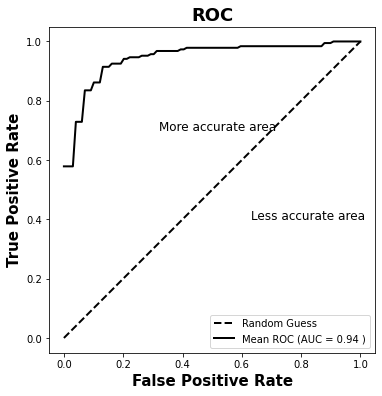

In [ ]:
# plot arrows
fig1 = plt.figure(figsize=[6,6])
ax1 = fig1.add_subplot(111,aspect = 'equal')


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train_rfe,y_train_b):
    prediction = clf.fit(x_train_rfe[train],y_train_b[train]).predict_proba(x_train_rfe[test])
    fpr, tpr, t = roc_curve(y_train_b[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black',label=r'Random Guess',alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate',fontweight='bold',fontsize=15)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=15)
plt.title('ROC',fontweight='bold',fontsize=18)
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()